In [56]:
import pandas as pd
import numpy as np
import plotly.express as px

In [57]:
# Read data
df = pd.read_csv('Data/archive/Melbourne_Housing_Data_Cleaned.csv')

In [58]:
df

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,LandArea,Council,Latitude,Longitude,Region,State
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,VIC
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,VIC
2,Abbotsford,5 Charles St,3,h,1465000.0,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,VIC
3,Abbotsford,40 Federation La,3,h,850000.0,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,VIC
4,Abbotsford,55a Park St,4,h,1600000.0,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,VIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Wollert,35 Kingscote Wy,3,h,570000.0,24/02/2018,25.5,3750,2,2,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,VIC
17996,Yarraville,13 Burns St,4,h,1480000.0,24/02/2018,6.3,3013,1,3,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,VIC
17997,Yarraville,29A Murray St,2,h,888000.0,24/02/2018,6.3,3013,2,1,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,VIC
17998,Yarraville,147A Severn St,2,t,705000.0,24/02/2018,6.3,3013,1,2,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,VIC


In [59]:
# Input (instead of asking user to input we can have a dropdown with available suburb names to choose from to avoid nulls)
suburb = input()

Airport West


In [60]:
# Filter data for provided suburb
df_filtered = df[df['Suburb'] == suburb]

In [61]:
df_filtered.head()

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,LandArea,Council,Latitude,Longitude,Region,State
38,Airport West,154 Halsey Rd,3,t,840000.0,3/09/2016,13.5,3042,2,1,303.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,VIC
39,Airport West,50 Bedford St,3,h,730000.0,3/12/2016,13.5,3042,2,1,0.0,Moonee Valley City Council,-37.7203,144.8755,Western Metropolitan,VIC
40,Airport West,50 Bedford St,3,h,770000.0,4/03/2017,13.5,3042,2,1,0.0,Moonee Valley City Council,-37.7203,144.8755,Western Metropolitan,VIC
41,Airport West,23 Hart St,2,h,603000.0,4/03/2017,13.5,3042,1,1,272.0,Moonee Valley City Council,-37.7294,144.8880,Western Metropolitan,VIC
42,Airport West,1/80 Hawker St,3,t,700000.0,4/03/2017,13.5,3042,2,2,239.0,Moonee Valley City Council,-37.7218,144.8837,Western Metropolitan,VIC


In [62]:
# Convert 'Date' column to datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], format='%d/%m/%Y')

C:\Users\Sayantan\AppData\Local\Temp/ipykernel_20716/3641188816.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# Extract month and year from 'Date' column
df_filtered['Year'] = df_filtered['Date'].dt.year
df_filtered['Month'] = df_filtered['Date'].dt.month

C:\Users\Sayantan\AppData\Local\Temp/ipykernel_20716/3225459496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sayantan\AppData\Local\Temp/ipykernel_20716/3225459496.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# Group by month number and year to count the number of sales
sales_per_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Number of Sales')

In [65]:
sales_per_month

,Year,Month,Number of Sales
0,2016,4,2
1,2016,5,4
2,2016,6,1
3,2016,7,4
4,2016,8,6
5,2016,9,6
6,2016,10,1
7,2016,11,4
8,2016,12,2
9,2017,2,2


In [66]:
# Map month numbers to month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
sales_per_month['Month_Name'] = sales_per_month['Month'].map(month_map)

In [67]:
# Create a bar chart with Plotly
fig = px.line(sales_per_month, x='Month_Name', y='Number of Sales', color='Year', 
             title='Number of Sales per Month', 
             labels={'Month_Name': 'Month', 'Number of Sales': 'Number of Sales'},
             category_orders={"Month_Name": list(month_map.values())})

In [68]:
# Set y-axis to display only whole numbers and adjust margin for x-axis
max_sales = sales_per_month['Number of Sales'].max()
fig.update_layout(yaxis=dict(tickvals=list(range(0, max_sales+1))))
# Show plot
fig.show()

In [69]:
# Group by year to get total sales for each year
total_sales_per_year = df_filtered.groupby('Year').size().reset_index(name='Total Sales')

In [70]:
total_sales_per_year

,Year,Total Sales
0,2016,30
1,2017,55
2,2018,11


In [71]:
# Calculate the percentage change from the previous year
total_sales_per_year['Percentage Change'] = total_sales_per_year['Total Sales'].pct_change() * 100


In [72]:
# Create a new column for the year interval representation
total_sales_per_year['Year Interval'] = (total_sales_per_year['Year'] - 1).astype(str) + '-' + total_sales_per_year['Year'].astype(str)


In [73]:
# Drop the first row since we don't have percentage change data for the first year
total_sales_per_year = total_sales_per_year.dropna()


In [74]:
total_sales_per_year

,Year,Total Sales,Percentage Change,Year Interval
1,2017,55,83.333333,2016-2017
2,2018,11,-80.000000,2017-2018


In [75]:
# Create a color column based on the 'Percentage Change' values
total_sales_per_year['Color'] = total_sales_per_year['Percentage Change'].apply(lambda x: 'green' if x >= 0 else 'red')

# Create a bar chart
fig = px.bar(total_sales_per_year, x='Year Interval', y='Percentage Change', 
             title='Percentage Change in Sales Over the Years',
             labels={'Year Interval': 'Year Interval', 'Percentage Change': 'Percentage Change (%)'},
             color='Color', color_discrete_map={'green': 'green', 'red': 'red'})

# Remove the color legend since it's not necessary
fig.update_layout(showlegend=False)

# Adjust the layout for better visualization
fig.update_layout(yaxis_title="Percentage Change (%)", xaxis_title="Year Interval",
                  margin=dict(l=0, r=0, b=60, t=40))

# Show the plot
fig.show()


C:\Users\Sayantan\AppData\Local\Temp/ipykernel_20716/2557539751.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
# Combine the 'Year' and 'Month' columns into a single 'Date' column of type `datetime`
sales_per_month['Date'] = pd.to_datetime(sales_per_month['Year'].astype(str) + '-' + sales_per_month['Month'].astype(str) + '-01')
sales_per_month = sales_per_month.set_index('Date')
sales_per_month_data = sales_per_month['Number of Sales']


In [77]:
sales_per_month_data

Date
2016-04-01     2
2016-05-01     4
2016-06-01     1
2016-07-01     4
2016-08-01     6
2016-09-01     6
2016-10-01     1
2016-11-01     4
2016-12-01     2
2017-02-01     2
2017-03-01     8
2017-04-01     5
2017-05-01     2
2017-06-01     7
2017-07-01     5
2017-08-01     4
2017-09-01     4
2017-10-01    13
2017-11-01     2
2017-12-01     3
2018-01-01     4
2018-02-01     2
2018-03-01     5
Name: Number of Sales, dtype: int64

In [78]:
from statsmodels.tsa.arima.model import ARIMA
import math

# Using ARIMA for time series forecasting
model = ARIMA(sales_per_month_data, order=(1,0,1))
model_fit = model.fit()

# Forecast for the next 6 months
forecast = np.ceil(model_fit.forecast(steps=6)).values.astype('int')
print(forecast)


[5 5 5 5 5 5]


C:\Users\Sayantan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Sayantan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Sayantan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Sayantan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Sayantan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No support

In [81]:
# Comment on market demand based on sales forecast
if forecast.sum() <= 20:
    print('LOW DEMAND')
if forecast.sum() >= 20 and forecast.sum() <= 50:
    print('MODERATE DEMAND')
if forecast.sum() > 50:
    print('HIGH DEMAND')

MODERATE DEMAND


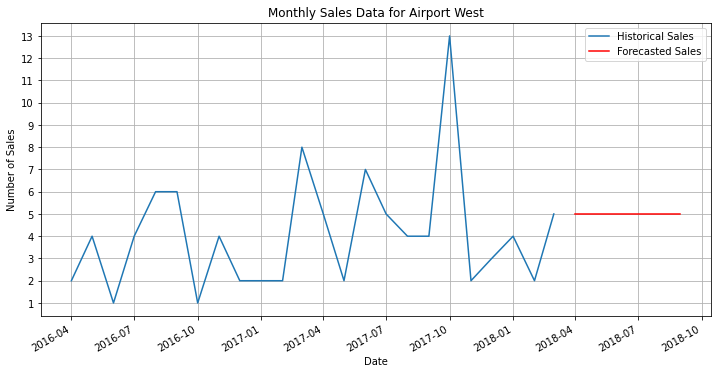

In [82]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt

# Plotting the historical sales data
sales_per_month_data.plot(figsize=(12, 6), label='Historical Sales')
plt.title('Monthly Sales Data for {suburb}'.format(suburb=suburb))
plt.ylabel('Number of Sales')
plt.xlabel('Date')
plt.grid(True)

# Plot the forecasted sales data for the next 6 months
forecast_dates = pd.date_range(sales_per_month_data.index[-1], periods=6, freq='M')  # Creating dates for the forecasted period
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red')

# Set y-axis to display only whole numbers
ax = plt.gca()  # Get the current Axes instance
ax.yaxis.set_major_locator(MultipleLocator(1))  # Set locator to multiples of 1

plt.legend()  # Display the legend
plt.show()